<a href="https://colab.research.google.com/github/niclar1987/colabintegrador/blob/main/Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
url = 'https://raw.githubusercontent.com/niclar1987/colabintegrador/main/df.csv'
df = pd.read_csv(url)

In [4]:
df

,ZONA DE SINIESTRO,SECCION DE SINIESTRO,NUMERO DE SINIESTRO,numero Stro,MATRICULA,RESULTADO,FUENTE,DESC-FUENTE,MOTIVO,DESC-MOTIVO,...,Id Poliza,Localidad Siniestro,Obj Id Marca,Modelo,Obj Uso,Provincia Siniestro,Tarifa Zona,TV,Id Plan,Monto Pagado (SUMA)
0,8,2,598368,008-002-00598368,4119171,Negativo,1,Tramitador,7,Autorrobo,...,055-002-00853842,VIRREY DEL P,360725.0,2018,1,1,0,1,D C/FF 8000,"106,850.01"
1,17,2,110398,017-002-00110398,357525,Desistido por el Socio,1,Tramitador,11,Magnificación de daños materiales,...,017-002-00626560,NEUQUEN,300181.0,2018,2,16,5,1,NaN,NaN
2,19,2,166330,019-002-00166330,5255454,Negativo,1,Tramitador,2,Préstamo póliza,...,054-002-00397424,CAPITAL FEDE,120432.0,2016,2,2,1,1,B,"7,500.00"
3,19,2,165843,019-002-00165843,5084571,Negativo,1,Tramitador,13,Magnificación de lesiones,...,058-002-00081456,CAPITAL FEDE,460722.0,2014,2,2,1,1,G,"6,320.00"
4,21,2,57897,021-002-00057897,4670028,Negativo,1,Tramitador,2,Préstamo póliza,...,021-002-00484472,EL BOLSON,180521.0,2011,1,17,18,1,A,"16,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12113,43,2,169078,043-002-00169078,4214349,Negativo,0,SIN DATOS,0,SIN DATOS,...,043-002-00870087,VIRREY DEL P,180336.0,2004,1,1,1,1,B,"183,963.00"
12114,46,20,3034,046-020-00003034,4457051,Negativo,0,SIN DATOS,0,SIN DATOS,...,046-020-00156522,GRANADERO BA,9370037.0,2019,0,22,21,18,F,"38,100.00"
12115,46,20,3079,046-020-00003079,2403762,Negativo,0,SIN DATOS,0,SIN DATOS,...,046-020-00140968,ROSARIO,8840010.0,2011,0,22,21,18,F,"28,100.00"
12116,57,20,964,057-020-00000964,5360361,Negativo,1,Tramitador,7,Autorrobo,...,057-020-00028780,PERDRIEL,9370036.0,2021,0,14,12,18,C,"4,700.00"


In [5]:
df.columns = df.columns.str.upper()

In [6]:
df

,ZONA DE SINIESTRO,SECCION DE SINIESTRO,NUMERO DE SINIESTRO,NUMERO STRO,MATRICULA,RESULTADO,FUENTE,DESC-FUENTE,MOTIVO,DESC-MOTIVO,...,ID POLIZA,LOCALIDAD SINIESTRO,OBJ ID MARCA,MODELO,OBJ USO,PROVINCIA SINIESTRO,TARIFA ZONA,TV,ID PLAN,MONTO PAGADO (SUMA)
0,8,2,598368,008-002-00598368,4119171,Negativo,1,Tramitador,7,Autorrobo,...,055-002-00853842,VIRREY DEL P,360725.0,2018,1,1,0,1,D C/FF 8000,"106,850.01"
1,17,2,110398,017-002-00110398,357525,Desistido por el Socio,1,Tramitador,11,Magnificación de daños materiales,...,017-002-00626560,NEUQUEN,300181.0,2018,2,16,5,1,NaN,NaN
2,19,2,166330,019-002-00166330,5255454,Negativo,1,Tramitador,2,Préstamo póliza,...,054-002-00397424,CAPITAL FEDE,120432.0,2016,2,2,1,1,B,"7,500.00"
3,19,2,165843,019-002-00165843,5084571,Negativo,1,Tramitador,13,Magnificación de lesiones,...,058-002-00081456,CAPITAL FEDE,460722.0,2014,2,2,1,1,G,"6,320.00"
4,21,2,57897,021-002-00057897,4670028,Negativo,1,Tramitador,2,Préstamo póliza,...,021-002-00484472,EL BOLSON,180521.0,2011,1,17,18,1,A,"16,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12113,43,2,169078,043-002-00169078,4214349,Negativo,0,SIN DATOS,0,SIN DATOS,...,043-002-00870087,VIRREY DEL P,180336.0,2004,1,1,1,1,B,"183,963.00"
12114,46,20,3034,046-020-00003034,4457051,Negativo,0,SIN DATOS,0,SIN DATOS,...,046-020-00156522,GRANADERO BA,9370037.0,2019,0,22,21,18,F,"38,100.00"
12115,46,20,3079,046-020-00003079,2403762,Negativo,0,SIN DATOS,0,SIN DATOS,...,046-020-00140968,ROSARIO,8840010.0,2011,0,22,21,18,F,"28,100.00"
12116,57,20,964,057-020-00000964,5360361,Negativo,1,Tramitador,7,Autorrobo,...,057-020-00028780,PERDRIEL,9370036.0,2021,0,14,12,18,C,"4,700.00"


In [7]:
df = df.drop(['MOTIVO', 'MATRICULA','FUENTE','CIERRE','ID POLIZA','OBSERVACIONES'], axis=1)

In [8]:
# Valores Unicos

df.nunique()

ZONA DE SINIESTRO                   37
SECCION DE SINIESTRO                 2
NUMERO DE SINIESTRO              11860
NUMERO STRO                      12118
RESULTADO                           10
DESC-FUENTE                         15
DESC-MOTIVO                         15
DESC-CIERRE                         16
FECHA-RECEPCION                    817
FECHA-PEDIDO                       750
FECHA-RECIBIDO                     980
FECHA-PAGO                         798
FECHA-CIERRE                       815
ABONADO                           2077
AHORRADO                          3705
RIESGO                               9
TIPO-ASEG                            7
FEC-NAC                           7822
LUGAR-NAC                          942
NACIONALIDAD                        22
SEXO                                 3
IVA                                  6
ZONA                                39
COD.ACT.                           561
DES.ACT.                           672
PRODUC                   

In [9]:
df = df[df['RESULTADO'] != 'Prescripto']

In [10]:
df["RESULTADO"]

0                      Negativo
1        Desistido por el Socio
2                      Negativo
3                      Negativo
4                      Negativo
                  ...          
12113                  Negativo
12114                  Negativo
12115                  Negativo
12116                  Negativo
12117                  Negativo
Name: RESULTADO, Length: 11997, dtype: object

In [11]:
df.loc[df["RESULTADO"] != "Negativo","RESULTADO"] = 1
df.loc[df["RESULTADO"] == "Negativo","RESULTADO"] = 0

df.loc[df["SECCION DE SINIESTRO"] == 2 ,"SECCION DE SINIESTRO"] = "Auto"
df.loc[df["SECCION DE SINIESTRO"] == 20 ,"SECCION DE SINIESTRO"] = "Moto"

In [12]:
df["RESULTADO"]

0        0
1        1
2        0
3        0
4        0
        ..
12113    0
12114    0
12115    0
12116    0
12117    0
Name: RESULTADO, Length: 11997, dtype: object

In [13]:
df = df.set_index('NUMERO STRO')

In [14]:
df

,ZONA DE SINIESTRO,SECCION DE SINIESTRO,NUMERO DE SINIESTRO,RESULTADO,DESC-FUENTE,DESC-MOTIVO,DESC-CIERRE,FECHA-RECEPCION,FECHA-PEDIDO,FECHA-RECIBIDO,...,ID MATRICULA (DIM ASEGURADOS),LOCALIDAD SINIESTRO,OBJ ID MARCA,MODELO,OBJ USO,PROVINCIA SINIESTRO,TARIFA ZONA,TV,ID PLAN,MONTO PAGADO (SUMA)
NUMERO STRO,,,,,,,,,,,,,,,,,,,,,
008-002-00598368,8,Auto,598368,0,Tramitador,Autorrobo,SIN DATOS,16/12/2021,17/12/2021,10/01/2022,...,4119171,VIRREY DEL P,360725.0,2018,1,1,0,1,D C/FF 8000,"106,850.01"
017-002-00110398,17,Auto,110398,1,Tramitador,Magnificación de daños materiales,Magnificación de daños materiales,16/07/2020,27/07/2020,NaN,...,357525,NEUQUEN,300181.0,2018,2,16,5,1,NaN,NaN
019-002-00166330,19,Auto,166330,0,Tramitador,Préstamo póliza,SIN DATOS,27/01/2022,21/03/2022,28/04/2022,...,5255454,CAPITAL FEDE,120432.0,2016,2,2,1,1,B,"7,500.00"
019-002-00165843,19,Auto,165843,0,Tramitador,Magnificación de lesiones,SIN DATOS,28/01/2022,31/01/2022,10/03/2022,...,5084571,CAPITAL FEDE,460722.0,2014,2,2,1,1,G,"6,320.00"
021-002-00057897,21,Auto,57897,0,Tramitador,Préstamo póliza,SIN DATOS,29/06/2020,07/07/2020,20/08/2020,...,4670028,EL BOLSON,180521.0,2011,1,17,18,1,A,"16,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
043-002-00169078,43,Auto,169078,0,SIN DATOS,SIN DATOS,SIN DATOS,03/12/2019,09/12/2019,20/12/2019,...,4214349,VIRREY DEL P,180336.0,2004,1,1,1,1,B,"183,963.00"
046-020-00003034,46,Moto,3034,0,SIN DATOS,SIN DATOS,SIN DATOS,03/07/2019,12/07/2019,20/08/2019,...,4457051,GRANADERO BA,9370037.0,2019,0,22,21,18,F,"38,100.00"
046-020-00003079,46,Moto,3079,0,SIN DATOS,SIN DATOS,SIN DATOS,17/07/2019,18/07/2019,27/08/2019,...,2403762,ROSARIO,8840010.0,2011,0,22,21,18,F,"28,100.00"


In [15]:
df.describe()

,ZONA DE SINIESTRO,NUMERO DE SINIESTRO,ABONADO,AHORRADO,ZONA,COD.ACT.,PRODUC,ACCIDENTE,INCENDIO,PA,...,DC,DM,COD POSTAL,ID MATRICULA (DIM ASEGURADOS),OBJ ID MARCA,MODELO,OBJ USO,PROVINCIA SINIESTRO,TARIFA ZONA,TV
count,11997.000000,11997.000000,11997.000000,1.199700e+04,11217.000000,11217.000000,11217.000000,11997.000000,11997.000000,11997.000000,...,11997.000000,11997.000000,11997.000000,1.199700e+04,1.180400e+04,11997.000000,11997.000000,11997.000000,11997.000000,11997.000000
mean,38.850463,143464.854797,6159.010188,6.177241e+04,45.543550,269569.383703,9476.383347,0.199216,0.012503,0.013253,...,0.065350,0.346753,3698.607068,3.885419e+06,6.589877e+05,2011.528465,1.138368,9.246228,8.168876,3.532883
std,18.699003,162642.339749,9128.507228,1.762775e+05,17.250346,332231.996930,6115.481154,0.573962,0.125229,0.114362,...,0.247152,0.475956,2085.535071,1.205178e+06,1.802730e+06,27.039018,1.219435,8.806081,7.637403,4.255513
min,2.000000,13.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.875400e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,32880.000000,2576.000000,0.000000e+00,46.000000,98.000000,6466.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1838.000000,3.332475e+06,1.707170e+05,2009.000000,1.000000,1.000000,1.000000,1.000000
50%,47.000000,92190.000000,3600.000000,0.000000e+00,54.000000,98.000000,9166.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3196.000000,4.175619e+06,1.901515e+05,2013.000000,1.000000,4.000000,7.000000,1.000000
75%,52.000000,158133.000000,6000.000000,7.350000e+04,55.000000,492140.000000,14218.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,5400.000000,4.770226e+06,3.608272e+05,2017.000000,1.000000,18.000000,15.000000,6.000000
max,61.000000,610615.000000,130680.000000,4.800577e+06,61.000000,970000.000000,22300.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,9420.000000,5.649093e+06,9.900247e+06,2022.000000,15.000000,24.000000,23.000000,24.000000


<AxesSubplot:>

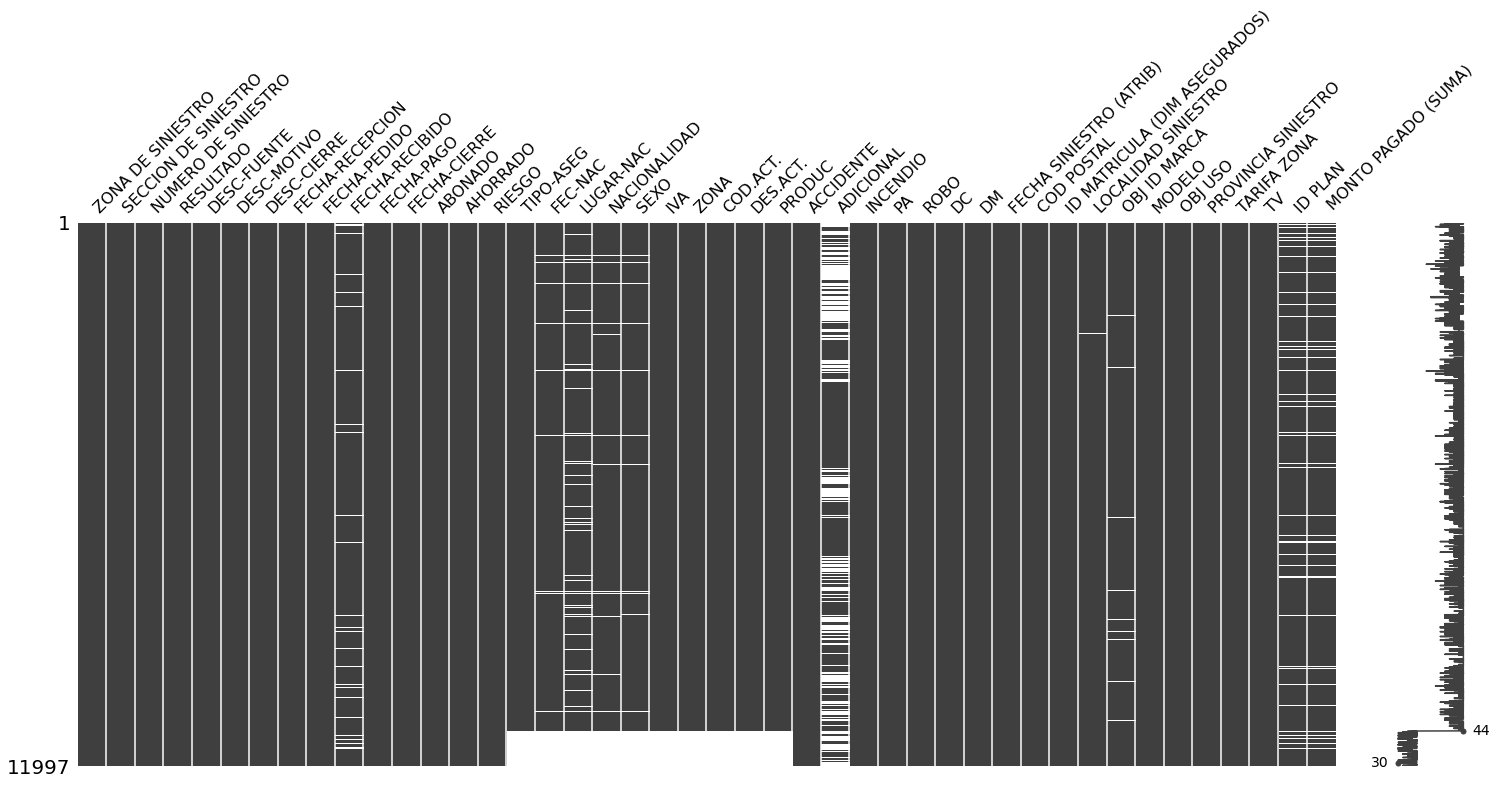

In [16]:
# Datos Faltantes
msno.matrix(df)

<AxesSubplot:>

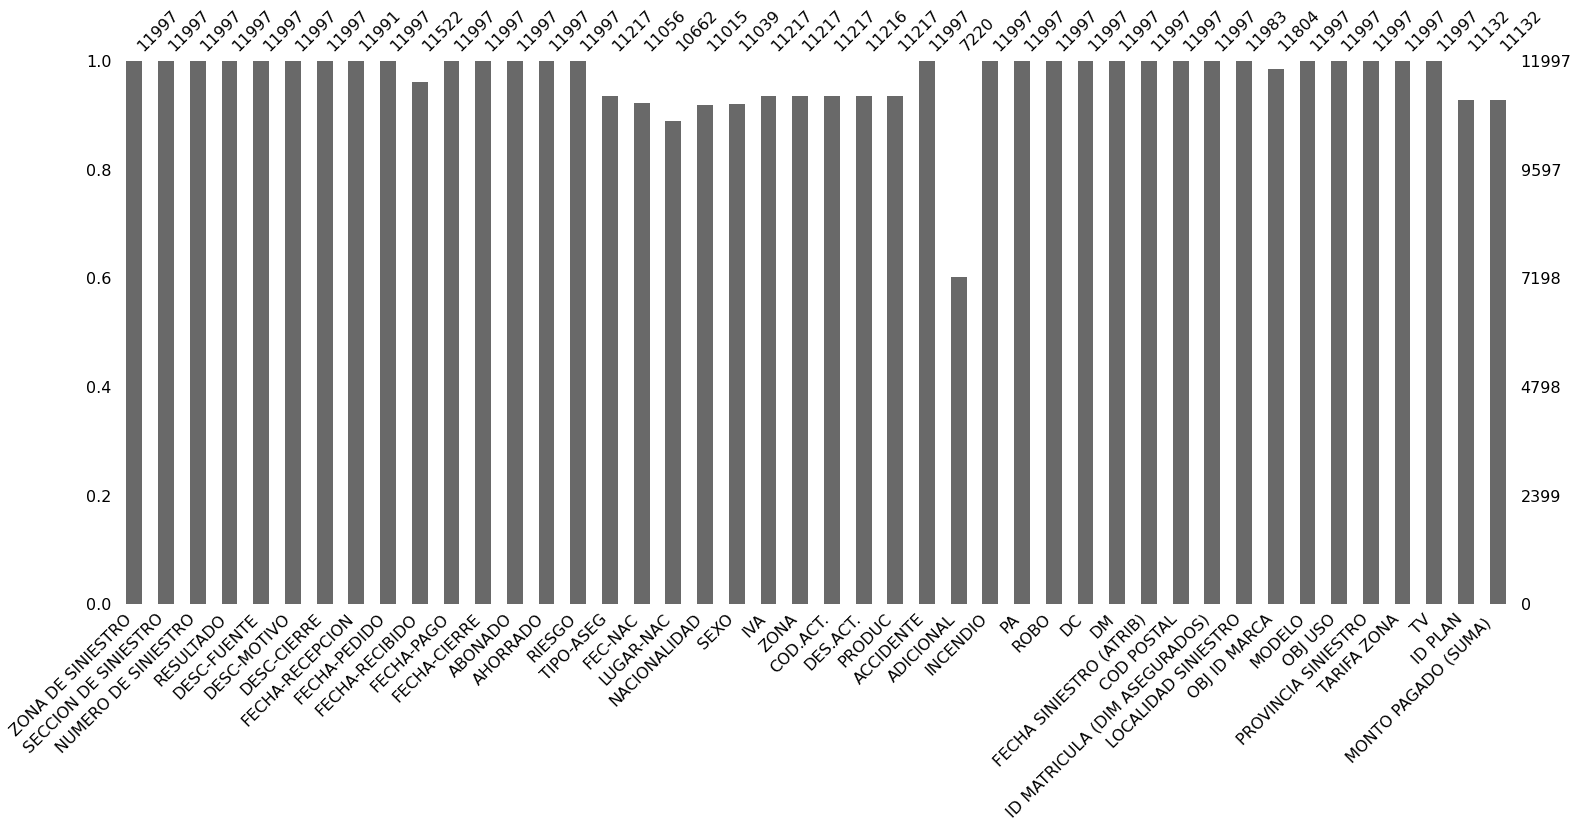

In [17]:
msno.bar(df)

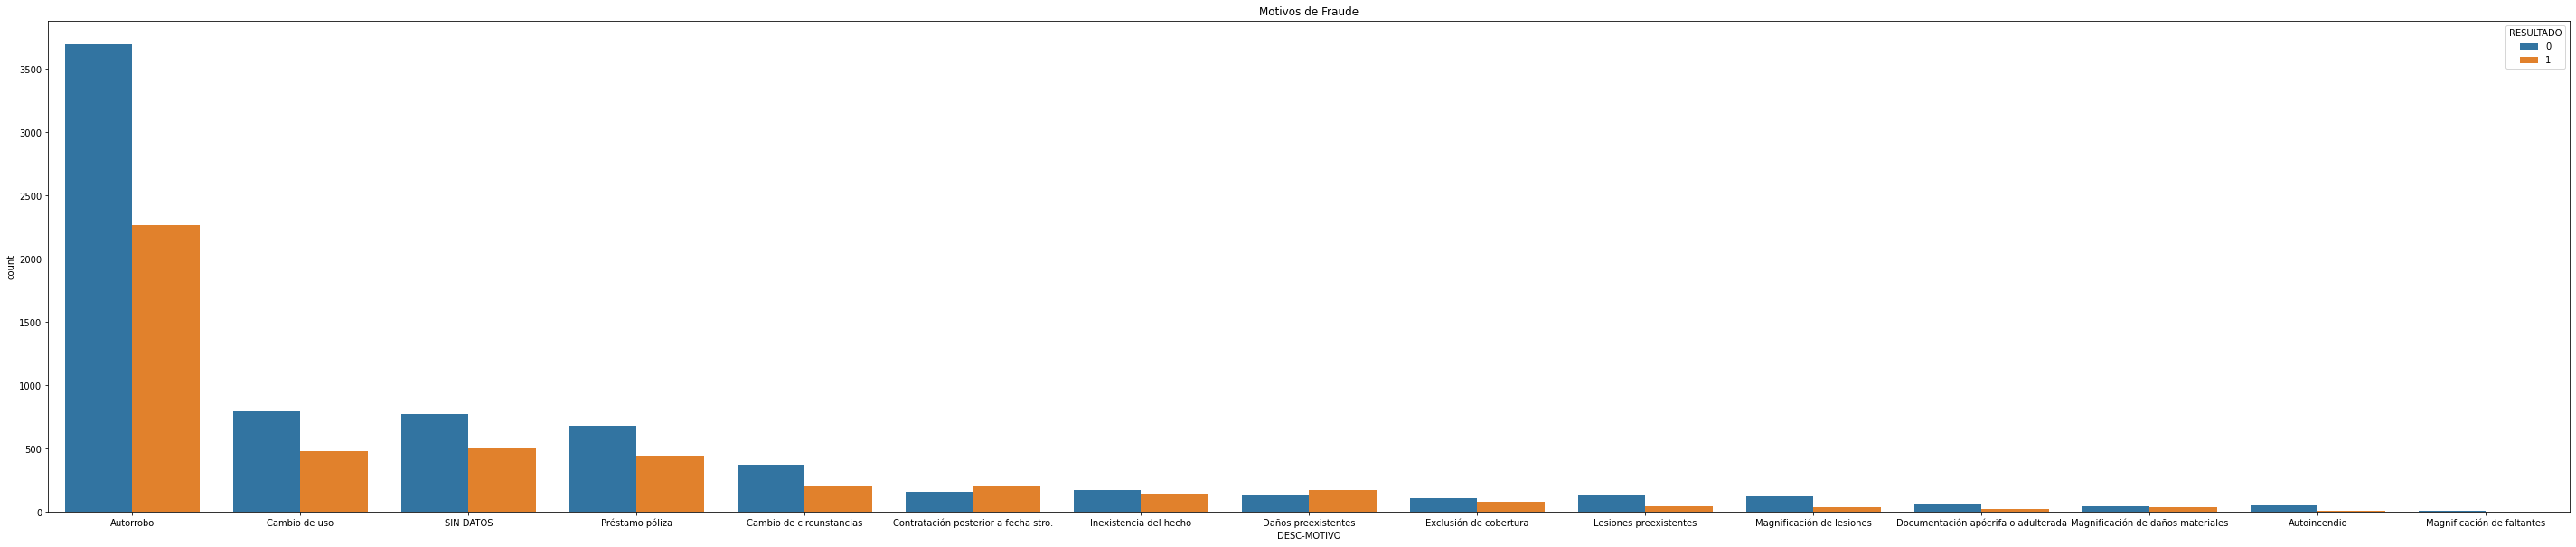

In [18]:
plt.figure(figsize=(50,10))
plt.title('Motivos de Fraude')
sns.countplot(data=df, x ='DESC-MOTIVO', hue='RESULTADO', order = df['DESC-MOTIVO'].value_counts().index);

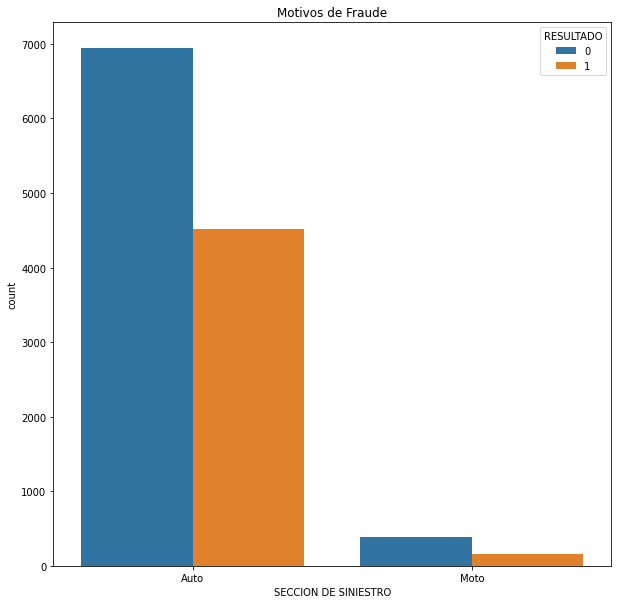

In [19]:
plt.figure(figsize=(10,10))
plt.title('Motivos de Fraude')
sns.countplot(data=df, x ='SECCION DE SINIESTRO', hue='RESULTADO', order = df['SECCION DE SINIESTRO'].value_counts().index);

In [20]:
Test git bug

SyntaxError: invalid syntax (14816349.py, line 1)